# Examining the crossmatches in more detail.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.coordinates import FK5
from astropy.coordinates import ICRS
import astropy.coordinates as coord
from astropy.table import Table

plotpar = {'axes.labelsize': 30,
                  'font.size': 22,
                  'legend.fontsize': 15,
                  'xtick.labelsize': 30,
                  'ytick.labelsize': 30,
                  'text.usetex': True}
plt.rcParams.update(plotpar)

First, let's look at the Kepler-Gaia crossmatch.

In [2]:
with fits.open("../../data/kepler_edr3_1arcsec.fits") as data:
    gaia3 = pd.DataFrame(data[1].data, dtype="float64")

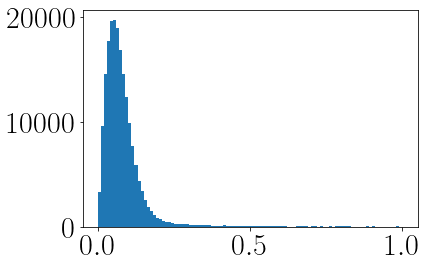

In [3]:
plt.hist(gaia3.kepler_gaia_ang_dist, 100);

Now the APOGEE crossmatch

In [12]:
# tbl = Table.read("../data/apogee_dr16_tmass_edr3_xmatch_2.fits", format='fits')
tbl = Table.read("../data/apogee_dr16_tmass_psc_edr3_xmatch.fits", format='fits')  # This is Joel's new version
names = [name for name in tbl.colnames if len(tbl[name].shape) <= 1]
apo3 = tbl[names].to_pandas()

In [9]:
# for k in apo3.keys():
#     print(k)

In [10]:
tbl = Table.read("../data/apogeedr16_stars.fits", format='fits')
names = [name for name in tbl.colnames if len(tbl[name].shape) <= 1]
apo2 = tbl[names].to_pandas()

apo23 = pd.merge(apo2, apo3, how="left", left_on="GAIA_SOURCE_ID", right_on="dr2_source_id")

(22.0, 3.0)

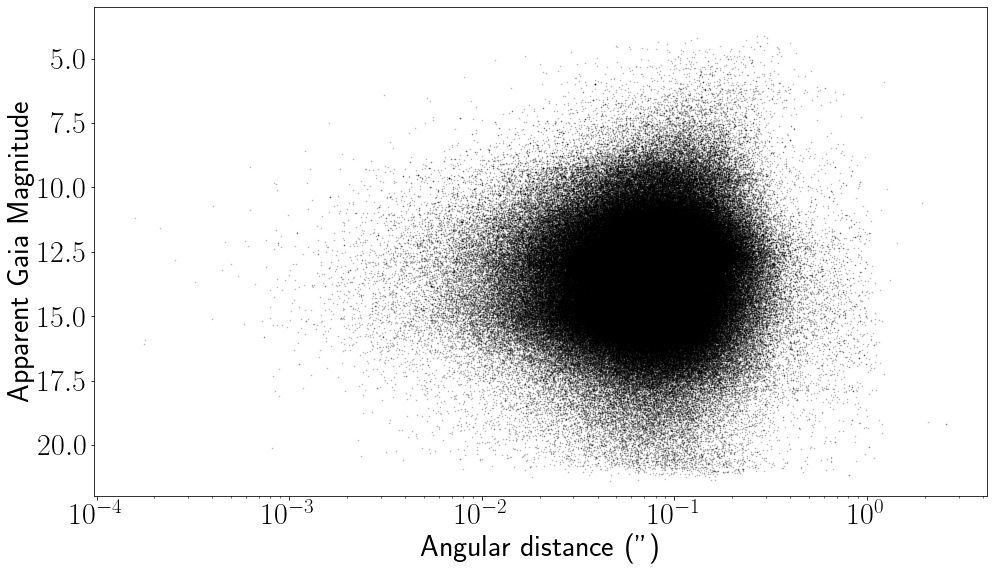

In [11]:
plt.figure(figsize=(16, 9))
plt.plot(apo23.tmass_edr3_angular_distance, apo23.GAIA_PHOT_G_MEAN_MAG, "k.", ms=3, alpha=.3, mec="none")
# plt.plot(apo23.angular_distance, apo23.GAIA_PHOT_G_MEAN_MAG, "k.", ms=3, alpha=.3, mec="none")

# plt.axhline(13)
plt.xscale("log")
plt.xlabel("Angular distance ('')")
plt.ylabel("Apparent Gaia Magnitude")
plt.ylim(22, 3)

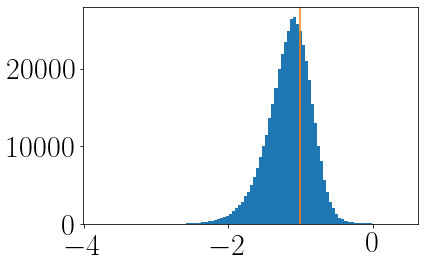

In [100]:
plt.hist(np.log10(apo23.tmass_edr3_angular_distance), 100);
plt.axvline(-1, color="C1")

In [102]:
mgood = (apo23.tmass_edr3_angular_distance.values < .1)
print(len(apo23), sum(mgood))

473307 300892


Merge lamost and gaia

In [13]:
lamost = pd.read_csv("../data/LAMOST-EDR3_distances_1arcsec_Xmatch.csv")
lamost

,angDist,_RAJ2000,_DEJ2000,RAJ2000,DEJ2000,Teff,e_Teff,q_Teff,logg,e_logg,...,Source,RA_ICRS,DE_ICRS,rgeo,b_rgeo,B_rgeo,rpgeo,b_rpgeo,B_rpgeo,Flag
0,0.108730,283.496898,34.611846,283.496898,34.611846,5051.56,542.9390,1,3.50623,1.146900,...,2092323249882285056,283.496881,34.611819,3688.938230,3304.843260,4085.545900,3509.319090,3067.347660,3974.033940,10033
1,0.306089,283.762917,34.560630,283.762917,34.560630,6305.92,89.1049,1,4.24781,0.184741,...,2092367367784904832,283.762854,34.560562,1290.843750,1241.423460,1339.509160,1268.161740,1213.368290,1329.233890,10033
2,0.197046,283.750506,34.629793,283.750506,34.629793,5759.52,541.1160,1,4.74864,0.924433,...,2092367848821273216,283.750495,34.629739,1218.877930,1188.860110,1250.213870,1223.792240,1193.274900,1254.622800,10033
3,0.102496,283.868630,34.794418,283.868630,34.794418,5711.05,687.4240,1,5.07067,1.144720,...,2092423477237842944,283.868665,34.794420,2367.415040,2211.831300,2540.238530,2303.529300,2192.817630,2430.978760,10033
4,0.047569,283.437028,34.737162,283.437028,34.737162,6564.84,377.4420,1,3.37737,0.750619,...,2092337955849457792,283.437013,34.737157,2206.965820,2113.801510,2316.194090,2204.433590,2111.001220,2310.559810,10033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247176,0.125913,287.114835,45.415639,287.114835,45.415639,6362.94,23.7481,1,3.98251,0.060509,...,2106256948420770432,287.114818,45.415606,1131.224850,1119.990600,1143.115840,1127.125610,1113.973880,1140.835210,10033
247177,0.071216,286.935270,45.370026,286.935270,45.370026,4949.24,545.0030,1,2.37893,1.297660,...,2106262377259609088,286.935298,45.370026,1120.418950,1099.698000,1140.929690,1125.690800,1105.600950,1145.229860,10033
247178,0.912920,287.065354,45.312986,287.065354,45.312986,6027.13,17.6651,1,4.29433,0.035565,...,2106250351350964480,287.065329,45.312733,813.220215,805.892029,820.200989,810.912292,805.199524,817.679199,10033
247179,0.185635,285.856336,44.806411,285.856336,44.806411,5792.64,22.1456,1,4.22238,0.047145,...,2106310240374737536,285.856382,44.806451,894.641296,881.764099,904.453857,892.793579,883.121948,902.222412,10033


In [15]:
for k in lamost.keys():
    print(k)

angDist
_RAJ2000
_DEJ2000
RAJ2000
DEJ2000
Teff
e_Teff
q_Teff
logg
e_logg
q_logg
Vt
e_Vt
q_Vt
[Fe/H]
e_[Fe/H]
q_[Fe/H]
[C/Fe]
q_[C/Fe]
[N/Fe]
q_[N/Fe]
[O/Fe]
q_[O/Fe]
[Na/Fe]
q_[Na/Fe]
[Mg/Fe]
q_[Mg/Fe]
[Al/Fe]
q_[Al/Fe]
[Si/Fe]
q_[Si/Fe]
[Ca/Fe]
q_[Ca/Fe]
[Ti/Fe]
q_[Ti/Fe]
[Cr/Fe]
q_[Cr/Fe]
[Mn/Fe]
q_[Mn/Fe]
[Co/Fe]
q_[Co/Fe]
[Ni/Fe]
q_[Ni/Fe]
[Cu/Fe]
q_[Cu/Fe]
[Ba/Fe]
q_[Ba/Fe]
Mult
SubClass
LAMOST
Source
RA_ICRS
DE_ICRS
rgeo
b_rgeo
B_rgeo
rpgeo
b_rpgeo
B_rpgeo
Flag


In [129]:
lamost = pd.read_csv("../data/gaia-kepler-lamost_snr.csv")
lamost["ra_6dp"] = lamost.inputobjs_input_ra.values
lamost["dec_6dp"] = lamost.inputobjs_input_dec.values
# print(lamost.duplicated(subset=["inputobjs_input_ra", "inputobjs_input_dec"]))
# print(len(lamost), sum(lamost.duplicated(subset=["inputobjs_input_ra", "inputobjs_input_dec"])))
print(len(lamost), sum(lamost.duplicated(subset=["inputobjs_input_id"])))

# Round RVs down to 6dp.
gaia3["ra_6dp"] = np.round(gaia3.ra.values, 6)
gaia3["dec_6dp"] = np.round(gaia3.dec.values, 6)

lamost_gaia = pd.merge(gaia3, lamost, on=["ra_6dp", "dec_6dp"], how="left")
print(np.shape(lamost), np.shape(gaia3), np.shape(lamost_gaia))


for k in lamost.keys():
    print(k)

123039 52850
(123039, 30) (198451, 135) (203718, 163)
inputobjs_input_id
inputobjs_input_ra
inputobjs_input_dec
inputobjs_dist
catalogue_obsid
catalogue_obsdate
catalogue_planid
catalogue_spid
catalogue_fiberid
catalogue_snru
catalogue_snrg
catalogue_snrr
catalogue_snri
catalogue_snrz
catalogue_class
catalogue_subclass
catalogue_z
catalogue_z_err
catalogue_ra
catalogue_dec
stellar_teff
stellar_teff_err
stellar_logg
stellar_logg_err
stellar_feh
stellar_feh_err
stellar_rv
stellar_rv_err
ra_6dp
dec_6dp


123039 30233
9442


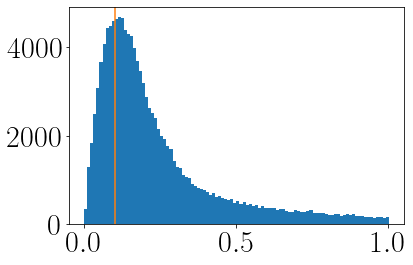

In [133]:
plt.hist(lamost.inputobjs_dist, 100);
plt.axvline(.1, color="C1")
print(len(lamost), len(lamost.iloc[lamost.inputobjs_dist.values < .1]))
close_lamost = lamost.iloc[lamost.inputobjs_dist.values < .1]
print(sum(close_lamost.duplicated(subset=["inputobjs_input_id"])))

Testing double column merge:

In [120]:
a = pd.DataFrame(dict({"c1": np.array([1, 2, 3, 4, 5]), "c2": np.array([6, 7, 8, 9, 10])}))
b = pd.DataFrame(dict({"c1": np.array([1, 3, 6, 2, 5]), "c2": np.array([6, 10, 7, 3, 10])}))
c = pd.merge(a, b, on=["c1", "c2"])
c

,c1,c2
0,1,6
1,5,10
